# Problem Statement 1: Data Exploration & Visualization

In [ ]:
#Step 1: Install & Import Required Libraries
!pip install yfinance plotly mplfinance --quiet

import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
# Set some display options
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)

In [ ]:
# Step 2: Download Stock Data
# Let's fetch 2 years of data for a stock.

def download_flat_yf(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, progress=False)
    data = data.xs(ticker, axis=1, level=1)
    data.columns.name = None
    return data

# Replace with any ticker of your choice. Make sure to add '.NS' at its end if its listed on NSE.
# Stock : Prince Pipe
stock_symbol = 'PRINCEPIPE.NS'
# Try to run this code for different start and end dates.
data = download_flat_yf(stock_symbol, start='2023-01-01', end='2025-05-29')
data.head()


,Close,High,Low,Open,Volume
Date,,,,,
2023-01-02,591.336365,600.520634,587.443075,591.086793,92128
2023-01-03,596.976746,600.121380,586.394908,587.043759,84091
2023-01-04,585.296753,598.923420,583.998990,597.326122,61195
2023-01-05,589.040344,597.975042,581.203801,584.947384,92362
2023-01-06,592.184998,597.076577,589.439703,589.789080,110297


In [ ]:
# Detailed desciption of each column in the DataFrame
data.describe()

,Close,High,Low,Open,Volume
count,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,561.666449,571.667338,554.909991,563.652977,2.580910e+05
std,137.972299,139.629232,136.530240,138.013752,6.056885e+05
min,239.830002,240.050003,229.050003,236.550003,0.000000e+00
25%,523.576202,537.539114,520.782315,526.472591,9.435250e+04
50%,594.680664,604.963047,588.042065,596.976735,1.471910e+05
75%,665.060059,677.413848,657.972210,666.233026,2.456045e+05
max,758.649658,774.672159,738.733760,768.582621,1.185202e+07


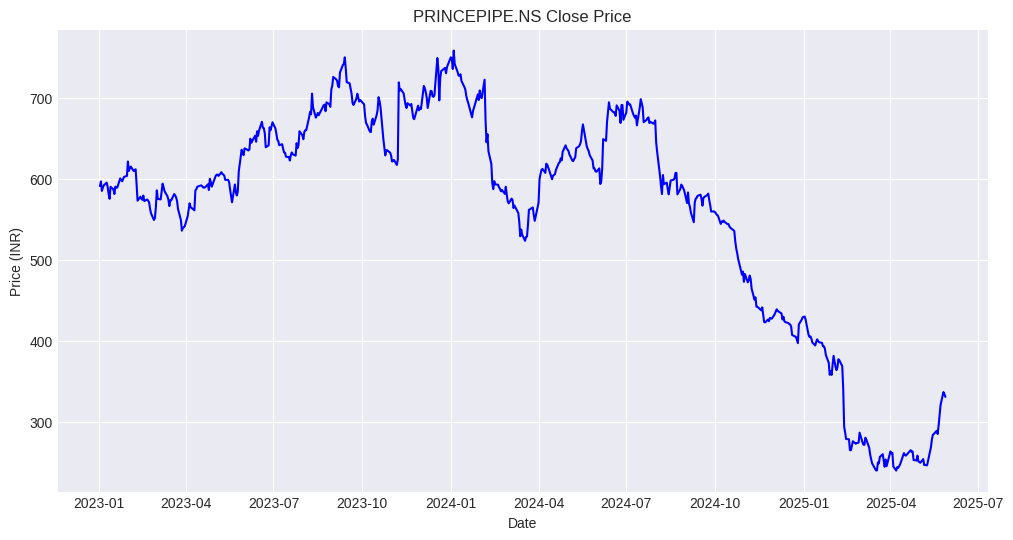

In [ ]:
# Displaying each trading day's closing price
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue')
plt.title(f'{stock_symbol} Close Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

In [ ]:
# Step 3: Plot Candlestick Chart
# We'll use Plotly for an interactive candlestick chart.

fig = go.Figure(data=[
    go.Candlestick(x=data.index,
                   open=data['Open'],
                   high=data['High'],
                   low=data['Low'],
                   close=data['Close'])
              ])
fig.update_layout(title=f"Candlestick Chart - {stock_symbol}", xaxis_title='Date', yaxis_title='Price')
fig.show()

In [ ]:
# Sample points of interest
event_1_date = '2023-11-08'
event_2_date = '2024-06-24'

fig = go.Figure(data=[
    go.Candlestick(
        x=data.index,
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close']
    )
])

# Adding vertical line and annotation for event 1
fig.add_vline(x=event_1_date, line_width=2, line_dash="dash", line_color="green")
fig.add_annotation(
    x=event_1_date,
    y=max(data['High']),  # Place annotation at the top
    text="Sudden Jump",
    showarrow=True,
    arrowhead=1,
    yshift=10
)

# Adding vertical line and annotation for event 2
fig.add_vline(x=event_2_date, line_width=2, line_dash="dash", line_color="red")
fig.add_annotation(
    x=event_2_date,
    y=max(data['High']),
    text="Trend Reversal",
    showarrow=True,
    arrowhead=1,
    yshift=10
)

fig.update_layout(
    title=f"Candlestick Chart - {stock_symbol}",
    xaxis_title='Date',
    yaxis_title='Price'
)

fig.show()

# My stock is : Prince Pipes and Fittings Limite

Prince Pipes and Fittings Limited is an integrated piping solution & multi polymer manufacturer. It was established in 1987 and initially manufactured PVC products. It is currently engaged in the manufacturing of polymer piping solutions in four types of polymers CPVC, UPVC, HDPE, PPR

# why surge on 08-Nov-2023 ??
Prince Pipes Shares Jump Over 15% On Returning To Profit In Q2 The company reported a consolidated net profit of Rs 70.63 crore in September quarter versus a loss of Rs 24.11 crore a year ago.

# why Trend reversal from 24-Jun-2024 ??
Prince Pipes & Fittings (PPF) stock may have started decreasing from June 24, 2024, due to a combination of factors, including weak financial performance and industry-specific challenges.
##Weak Financial Performance:
###Declining Net Sales and Operating Profit:
PPF has reported a decline in net sales and operating profit, indicating ongoing challenges for the company according to MarketsMojo.
###Negative Quarterly Results:
The company has experienced consecutive quarterly losses, further contributing to the negative perception of the stock.
##Industry-Specific Challenges:
###Weak Demand and RM Volatility:
Weak demand and fluctuating raw material prices, particularly for PVC, have impacted the company's performance according to MarketsMojo.
De-stocking in Channels:
Changes in PVC prices have led to de-stocking by distributors, impacting overall demand and volumes.

# Problem Statement 2: Returns & Volatility

In [ ]:
# Step 4: Calculate Returns
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change() # Returns 0.01 for 1% change

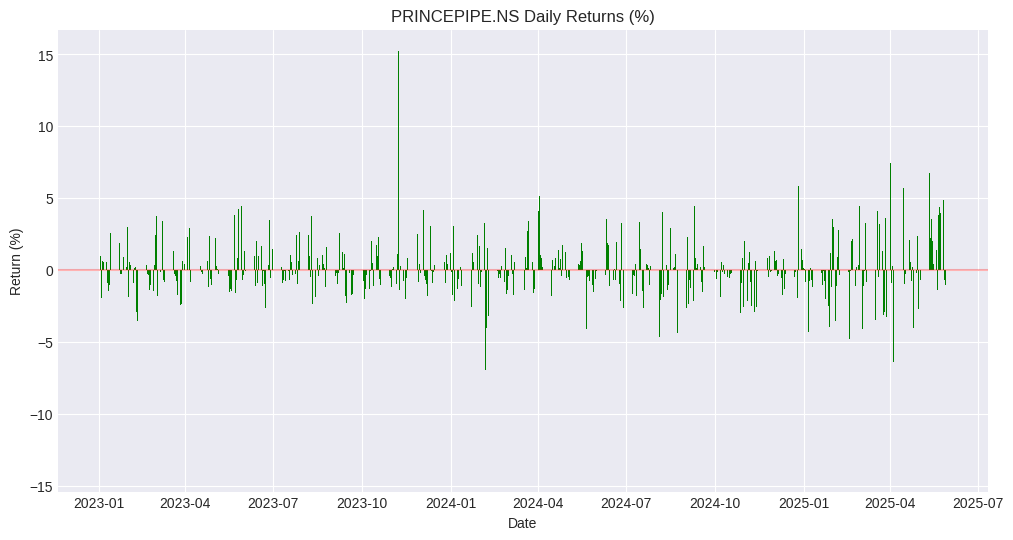

In [ ]:
# Visualize daily returns
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Daily Return']*100, color='green')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title(f'{stock_symbol} Daily Returns (%)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()

In [ ]:
data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))
data[['Daily Return', 'Log Return']].dropna().head()

,Daily Return,Log Return
Date,,
2023-01-03,0.009538,0.009493
2023-01-04,-0.019565,-0.019759
2023-01-05,0.006396,0.006376
2023-01-06,0.005339,0.005324
2023-01-09,0.005647,0.005631


In [ ]:
fig1 = px.line(data, x=data.index, y='Daily Return', title=f'{stock_symbol} Simple Returns')
fig1.show()

fig2 = px.line(data, x=data.index, y='Log Return', title=f'{stock_symbol} Log Returns')
fig2.show()

## Returns measure the rate of change in stock prices. The two widely used measures of returns are as follows:

### Simple Return: (P_t - P_{t-1}) / P_{t-1}
### Log Return: log(P_t / P_{t-1}) → additive over time

### Simple Returns and Log Returns are coinciding with each other here

From calculus, we know that:


ln(1+x)≈x when x is small,

-So if the simple return is small (say, < 5%), then:

𝑅
log
=
ln
⁡
(
1
+
𝑅
simple
)
≈
𝑅
simple

## They look significatly different if the change in closing price of stock is significant for ex. >= 5%

In [ ]:
data['Rolling Std Dev'] = data['Daily Return'].rolling(window=14).std()
fig = px.line(data, x=data.index, y='Rolling Std Dev', title='Rolling 21-Day Standard Deviation')
fig.show()

# Problem Statement 3: The Probability Paradox

In [ ]:
from scipy.stats import binom

In [ ]:
# Parameters
p_up = 0.6          # Probability of an UP day
n = 10              # Number of days
trials = 1000       # Monte‑Carlo replications

#  Using scipy.stats.binom
prob_exact = binom.pmf(6, n, p_up)          # P(X = 6)
prob_atleast = binom.sf(7, n, p_up)         # P(X ≥ 8)  [sf(k) = P(X > k)]

#  Simulation
hits = np.random.binomial(n, p_up, size=trials)
prob_exact_sim = (hits == 6).mean()
prob_atleast_sim = (hits >= 8).mean()

print(f"P(UP) = {p_up:.1%}\n")

print("Theoretical probabilities (scipy.stats.binom):")
print(f"  P(exactly 6 UPs in 10 days)  = {prob_exact:.4f}")
print(f"  P(at least 8 UPs in 10 days)  = {prob_atleast:.4f}")

print("\nSimulation results (1000 runs):")
print(f"  P(exactly 6 UPs)  ≈ {prob_exact_sim:.4f}")
print(f"  P(at least 8 UPs) ≈ {prob_atleast_sim:.4f}")

P(UP) = 60.0%

Theoretical probabilities (scipy.stats.binom):
  P(exactly 6 UPs in 10 days)  = 0.2508
  P(at least 8 UPs in 10 days)  = 0.1673

Simulation results (1000 runs):
  P(exactly 6 UPs)  ≈ 0.2620
  P(at least 8 UPs) ≈ 0.1480


In [ ]:
# column naming
data = data.sort_values("Date")
data["ret"] = data["Close"].pct_change()
data.dropna(inplace=True)

# Labelling UP and DOWN days
data["dir"] = np.where(data["ret"] > 0, "UP", "DOWN")

# Calculating average return for UP and DOWN days
r_up = data.loc[data["dir"] == "UP", "ret"].mean()
r_down = data.loc[data["dir"] == "DOWN", "ret"].mean()

# Assuming 6 UP and 4 DOWN days in a 10-day period
net_return = (6 * r_up + 4 * r_down) / 10

r_up, r_down, net_return


(np.float64(0.01568049102964571),
 np.float64(-0.012682645215666867),
 np.float64(0.00433523653152068))

## Part 3: The Ultimate Question

### The Bet:
- You win ₹100 if the stock goes **up**
- You lose ₹150 if the stock goes **down**

Assume:
- ( P(UP) = 0.6 \)
- ( P(DOWN) = 1 - 0.6 = 0.4 \)

---

### Step 1: Calculate Expected Value (EV)

Let’s compute the expected value using the formula:

\[
EV = (100 * P(UP)) + (-150 * P(DOWN))
\]

\[
EV = (100 \times 0.6) + (-150 \times 0.4) = 60 - 60 = 0
\]

---

### What Does This Mean?

Even though the stock goes up 60% of the time, the bet is designed so that:
- You gain ₹100 per win
- But lose ₹150 per loss

This imbalance cancels out any advantage from the higher probability of winning.  
So in the **long run**, your average outcome is:

> **₹0 — You break even.**

But here’s the problem: this bet has **asymmetric risk**.  
A few losses can wipe out many wins.

---

### Final Conclusion

Even though the expected value is ₹0, this bet is **not attractive** in practice.

Here’s why:
- The losses are bigger than the wins
- One bad streak of DOWN days (e.g., 3 in a row) would lose you ₹450, which takes 5 UP days just to recover
- The emotional and financial risk isn't worth it without a positive edge

---

### Would I Take the Bet?

**No.** I would only take this bet if:
- The win amount was increased (e.g., ₹125 or more), **or**
- The loss amount was reduced (e.g., to ₹100)

Until then, this is a **zero-expected-value bet with high downside risk**.

 **Better to avoid it.**
